# Data Analysis

This jupyter notebook demonstrates different ways the Market() class can simulate supplier behaviors. Three topics will be covered:
- How cost affects quantity supplied and revenue
- How competition affects quantity supplied and revenue
- How shifts in demand affect the quantity supplied and revenue
---

## 1. Imports

The project uses two 3rd party packages and the class defined in the `sessionmaker.py` file:
- Matplotlib: Package that creates visuals for data
- Numpy: Package that defines the `ndarray` class, which makes list arithmetic easier
- Market: Class defined in `sessionmaker.py` that defines a market with certain companies with different cost equations and customers with diffent needs

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sessionmaker import Market

## 2. Change in Cost

Describe Current Research

Plan: Create 3 scenarios and show the quantity and revenues


Quantity: [2, 3, 2, 3, 4, 5, 4, 3, 4, 5, 6, 5, 6, 7, 8, 9, 10, 11, 12, 11, 12, 13, 12, 11, 12, 13, 14, 13, 12, 13, 12, 11, 10, 9, 10, 11, 10, 9, 10, 11, 10, 9, 10, 9, 10, 11, 12, 13, 14, 15, 14, 13, 12, 13, 14, 15, 16, 15, 14, 15, 16, 15, 14, 15, 14, 13, 12, 13, 14, 15, 14, 15, 14, 15, 16, 15, 16, 17, 16, 15, 16, 17, 16, 15, 16, 17, 18, 17, 16, 17, 18, 19, 18, 17, 16, 17, 18, 19, 18, 19]
Profits: [475, 670, 620, 185, 490, 1125, 1025, 1170, 225, 795, 1495, 1340, 1275, 1320, 1730, 1830, 1870, 2955, 3290, 2495, 1665, 3335, 3085, 3155, 1950, 1970, 3140, 2640, 3435, 2700, 2135, 2250, 2785, 2875, 1640, 2770, 2330, 2830, 2135, 2365, 2300, 2910, 2650, 2265, 2255, 2275, 2545, 3405, 3485, 3840, 3100, 3875, 4205, 2785, 2865, 4145, 4365, 3595, 4355, 3510, 3875, 3280, 4020, 3865, 3495, 3995, 4005, 2275, 2700, 3605, 3520, 3380, 3220, 2965, 4695, 3960, 3725, 4140, 3325, 5380, 3740, 4050, 3155, 5060, 3190, 3300, 4015, 4000, 5035, 3865, 4755, 4830, 3850, 4230, 4520, 3020, 4300, 4730, 4705, 3865]
Prices

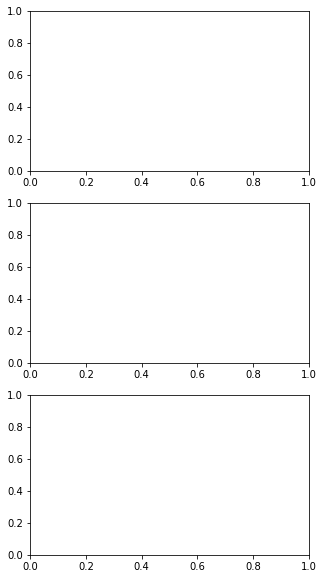

In [22]:
# Defining Market
m1 = Market()
m1.add_buyers(list(np.arange(1, 101)*5))
m1.add_seller('Company 1', lambda x: 5*x)

# Data extraction:
quantity_sold = []
profits = []
price_per_item = []

for i in range(100):
    m1.session()
    data = m1.sellers['Company 1']
    quantity_sold.append(data['Quantity'])
    profits.append(data['Previous Profit'])
    price_per_item.append(data['Costs'](data['Quantity'])/data['Quantity'])

buyer_prices = np.array(sorted(m1.buyer_prices)[::-1])
buyer_quantities = []

print(f'Quantity: {quantity_sold}')
print(f'Profits: {profits}')
print(f'Prices: {price_per_item}')
print(f'Buyers {buyer_prices}\n{buyer_quantities}')

# Graph Definitions: Line graph showing supplyand demand, graph with average profits at different quantities, and graph with average quantities produced
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, height_ratios=[10, 10, 10])
fig.set_figwidth(5)
fig.set_figheight(10)

## Supply and Demand
# Supply line

plt.show()